TFM_Master_IA

# Inteligencia artificial e innovación Fintech para prevención del fraude en pagos con tarjeta de crédito

Dataset principal fraudTrain.csv extraído de [HuggingFace](https://huggingface.co/datasets/dazzle-nu/CIS435-CreditCardFraudDetection)

In [4]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
!ls "/content/drive/My Drive/Colab Notebooks/datasets"

Mounted at /content/drive
TFM


In [5]:
from matplotlib.pyplot import imshow
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time
import pickle

In [6]:
# Cargar el conjunto de datos
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/TFM/fraudTrain.csv', engine='python')
# df=pd.read_csv(fraudTrain.csv, engine='python')

## Análisis del conjunto de datos

In [7]:
print(df.shape)

(1048575, 25)


In [8]:
# Visualizar las primeras filas del DataFrame
df.head()

Unnamed: 0 trans_date_trans_time        cc_num  \
0           0           1/1/19 0:00  2.703190e+15   
1           1           1/1/19 0:00  6.304230e+11   
2           2           1/1/19 0:00  3.885950e+13   
3           3           1/1/19 0:01  3.534090e+15   
4           4           1/1/19 0:03  3.755340e+14   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ... city_pop  \
0    Banks      F                561 Perry Cove  ...     3495   
1     Gill      F  43039 Riley Greens Suite 393  ...      149   
2  Sanchez      M      594 White Dale Suite 530  ...     4154   
3    White      M   9443 Cynthia Court Apt. 038  ...     1939   
4   Garcia      M              408 Bradley Rest  ...       99   

                                 job      dob  \
0          Psychologist, counselling   3/9/88   
1  Special educational needs teacher  6/21/78   
2        Nature conservation officer  1/19/62   
3                    Patent attorney  1/12/67   
4     Dance movement psychotherapist  3/28/86   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

  is_fraud Unnamed: 23  6006  
0        0         NaN   NaN  
1        0         NaN   NaN  
2        0         NaN   NaN  
3        0         NaN   NaN  
4        0         NaN   NaN  

[5 rows x 25 columns]

In [ ]:
# Visualizar tipo de columnas
print(df.info())

# Resumen estadístico
print(df.describe())

# Verificar si hay valores nulos
print(f'Valores nulos: {df.isnull().sum()}')

print(f'Filas que son fraude: {sum(df["is_fraud"])}')
print(f'Filas que no son fraude: {len(df["is_fraud"])- sum(df["is_fraud"])}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1048575 non-null  int64  
 1   trans_date_trans_time  1048575 non-null  object 
 2   cc_num                 1048575 non-null  float64
 3   merchant               1048575 non-null  object 
 4   category               1048575 non-null  object 
 5   amt                    1048575 non-null  float64
 6   first                  1048575 non-null  object 
 7   last                   1048575 non-null  object 
 8   gender                 1048575 non-null  object 
 9   street                 1048575 non-null  object 
 10  city                   1048575 non-null  object 
 11  state                  1048575 non-null  object 
 12  zip                    1048575 non-null  int64  
 13  lat                    1048575 non-null  float64
 14  long              

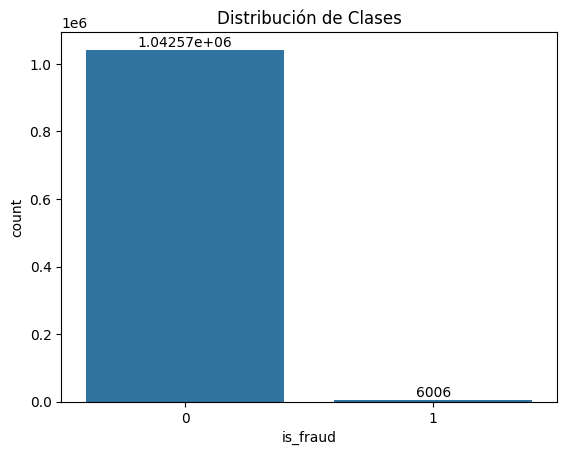

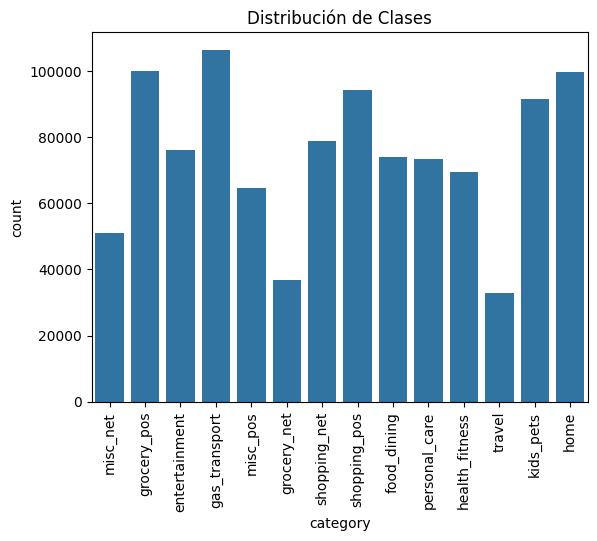

In [ ]:
# Distribución de las clases
ax = sns.countplot(x='is_fraud', data=df)
ax.bar_label(ax.containers[0])
plt.title('Distribución de Clases')
plt.show()

# Distribución de las clases
sns.countplot(x='category', data=df)
plt.title('Distribución de Clases')
plt.xticks(rotation=90)
plt.show()

<ipython-input-8-f2e3bbd1d755>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


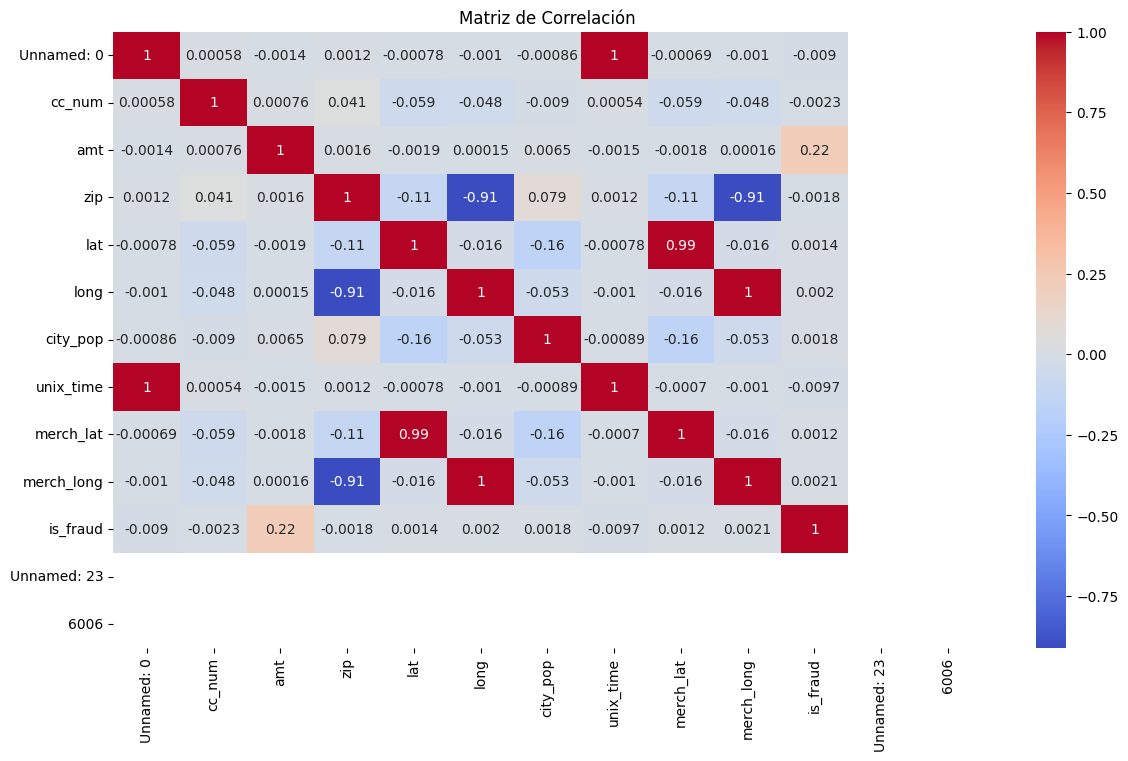

In [ ]:
# Matriz de correlación
correlation_matrix = df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Matriz de Correlación')
plt.show()

## Preparación de los datos

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])
df['merchant'] = le.fit_transform(df['merchant'])


X = df.drop('is_fraud', axis=1)
X = X.drop('trans_date_trans_time', axis=1)
X = X.drop('first', axis=1)
X = X.drop('last', axis=1)
X = X.drop('gender', axis=1)
X = X.drop('street', axis=1)
X = X.drop('city', axis=1)
X = X.drop('state', axis=1)
X = X.drop('zip', axis=1)
X = X.drop('lat', axis=1)
X = X.drop('long', axis=1)
X = X.drop('city_pop', axis=1)
X = X.drop('job', axis=1)
X = X.drop('dob', axis=1)
X = X.drop('trans_num', axis=1)
X = X.drop('Unnamed: 23', axis=1)
X = X.drop('6006', axis=1)
y = df['is_fraud']

print(X.info())

print(X.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1048575 non-null  int64  
 1   cc_num      1048575 non-null  float64
 2   merchant    1048575 non-null  int64  
 3   category    1048575 non-null  int64  
 4   amt         1048575 non-null  float64
 5   unix_time   1048575 non-null  int64  
 6   merch_lat   1048575 non-null  float64
 7   merch_long  1048575 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 64.0 MB
None
         Unnamed: 0        cc_num      merchant      category           amt  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   5.242870e+05  4.171565e+17  3.429630e+02  6.229184e+00  7.027910e+01   
std    3.026977e+05  1.308811e+18  2.010321e+02  3.914008e+00  1.599518e+02   
min    0.000000e+00  6.041621e+10  0.000000e+00  0.000000e+00  1.000000e+00   
25%    

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Se separan los datos en entrenamiento (60%), validación (20%) y test (20%)
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.25, random_state=42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.transform(X_test)

## Organización de las métricas

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, auc

In [ ]:
df_metrics = pd.DataFrame(columns=['Precision', 'Recall', 'F1-score', 'ROC_AUC', 'Training time', 'Inference time'],
                          index=['Neural net', 'Random forest', 'SVM', 'Naive Bayes', 'Isolation forest', 'KNN'])
df_metrics

Precision Recall F1-score ROC_AUC Training time  \
Neural net             NaN    NaN      NaN     NaN           NaN   
Random forest          NaN    NaN      NaN     NaN           NaN   
SVM                    NaN    NaN      NaN     NaN           NaN   
Naive Bayes            NaN    NaN      NaN     NaN           NaN   
Isolation forest       NaN    NaN      NaN     NaN           NaN   
KNN                    NaN    NaN      NaN     NaN           NaN   

                 Inference time  
Neural net                  NaN  
Random forest               NaN  
SVM                         NaN  
Naive Bayes                 NaN  
Isolation forest            NaN  
KNN                         NaN

## Red neuronal

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

neural_net = Sequential()
neural_net.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
neural_net.add(Dense(16, activation='relu'))
neural_net.add(Dense(1, activation='sigmoid'))

neural_net.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

start = time.time()
neural_net.fit(X_train, y_train, epochs=10, batch_size=64, class_weight=dict(enumerate(class_weights)), validation_data=(X_valid, y_valid), verbose=2)
training_time = time.time() - start

Epoch 1/10
9831/9831 - 25s - loss: 0.3802 - accuracy: 0.9522 - val_loss: 0.3049 - val_accuracy: 0.9732 - 25s/epoch - 3ms/step
Epoch 2/10
9831/9831 - 24s - loss: 0.2929 - accuracy: 0.9600 - val_loss: 0.1673 - val_accuracy: 0.9831 - 24s/epoch - 2ms/step
Epoch 3/10
9831/9831 - 23s - loss: 0.2419 - accuracy: 0.9633 - val_loss: 0.2106 - val_accuracy: 0.9725 - 23s/epoch - 2ms/step
Epoch 4/10
9831/9831 - 23s - loss: 0.2237 - accuracy: 0.9685 - val_loss: 0.2808 - val_accuracy: 0.9335 - 23s/epoch - 2ms/step
Epoch 5/10
9831/9831 - 23s - loss: 0.2144 - accuracy: 0.9715 - val_loss: 0.1873 - val_accuracy: 0.9705 - 23s/epoch - 2ms/step
Epoch 6/10
9831/9831 - 24s - loss: 0.2070 - accuracy: 0.9716 - val_loss: 0.1644 - val_accuracy: 0.9763 - 24s/epoch - 2ms/step
Epoch 7/10
9831/9831 - 24s - loss: 0.2031 - accuracy: 0.9717 - val_loss: 0.2044 - val_accuracy: 0.9633 - 24s/epoch - 2ms/step
Epoch 8/10
9831/9831 - 28s - loss: 0.2012 - accuracy: 0.9729 - val_loss: 0.1605 - val_accuracy: 0.9805 - 28s/epoch - 3

6554/6554 [==============================] - 11s 2ms/step
F1-score: 0.2299495232753786
Matriz de Confusión:
[[201825   6709]
 [   156   1025]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    208534
           1       0.13      0.87      0.23      1181

    accuracy                           0.97    209715
   macro avg       0.57      0.92      0.61    209715
weighted avg       0.99      0.97      0.98    209715



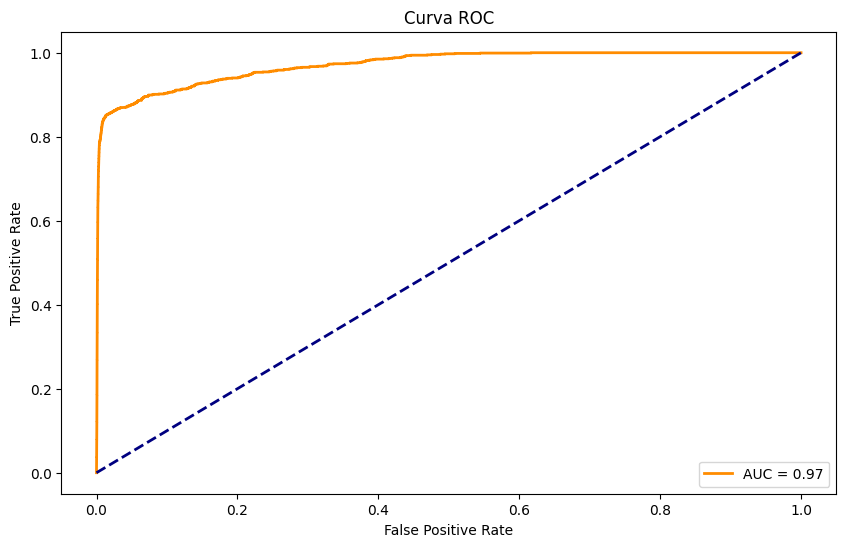

In [ ]:
start = time.time()
y_pred_prob = neural_net.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
inference_time = time.time() - start

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1}")

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Mostrar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
df_metrics.loc['Neural net'] = {'Precision': precision,
                                'Recall': recall,
                                'F1-score': f1,
                                'ROC_AUC': roc_auc,
                                'Training time': training_time,
                                'Inference time': inference_time}
df_metrics

Precision    Recall  F1-score   ROC_AUC Training time  \
Neural net        0.106345  0.898391  0.190177  0.980413      263.0038   
Random forest          NaN       NaN       NaN       NaN           NaN   
SVM                    NaN       NaN       NaN       NaN           NaN   
Naive Bayes            NaN       NaN       NaN       NaN           NaN   
Isolation forest       NaN       NaN       NaN       NaN           NaN   
KNN                    NaN       NaN       NaN       NaN           NaN   

                 Inference time  
Neural net            13.003628  
Random forest               NaN  
SVM                         NaN  
Naive Bayes                 NaN  
Isolation forest            NaN  
KNN                         NaN

In [ ]:
pip install lime shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=ed66e441dcc57d9c6a1a07ee168ee82261d79fcc4ff9540211aba27f861d1f73
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


Este código primero define la función predict_proba que ajusta las predicciones del modelo analizado para que sean compatibles con LIME, luego crea el explainer de LIME, selecciona una instancia específica de X_test usando el índice i, y finalmente llama a explain_instance para obtener y mostrar la explicación de LIME para esa instancia específica. Asegúrate de que X.columns sea accesible y contenga los nombres de las características que se usaron para entrenar el modelo.

In [ ]:
import lime
from lime import lime_tabular
import numpy as np

# Definir la función de envoltura para devolver probabilidades
def predict_proba(model, X):
    y_pred = model.predict(X)
    return np.hstack((1-y_pred, y_pred))

# Crear el explainer de LIME
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns,
    class_names=['Not Fraud', 'Fraud'],
    mode='classification'
)

# Definir el índice de la instancia a explicar
i = 10  # Asegúrate de que este índice exista en X_test

# Seleccionar la instancia específica y asegurarse de que sea un array 2D
instance = X_test[i].reshape(1, -1)

# Explicar la instancia seleccionada usando LIME
exp = explainer.explain_instance(instance[0], lambda x: predict_proba(neural_net, x), num_features=10)

# Mostrar la explicación
exp.show_in_notebook(show_table=True, show_all=False)

157/157 [==============================] - 0s 3ms/step


In [ ]:
!pip install --upgrade tensorflow shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 41.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
!pip show shap  # Verificar la versión instalada
!pip install --upgrade shap  # Actualizar SHAP

Name: shap
Version: 0.44.1
Summary: A unified approach to explain the output of any machine learning model.
Home-page: 
Author: 
Author-email: Scott Lundberg <slund1@cs.washington.edu>
License: MIT License
Location: /usr/local/lib/python3.10/dist-packages
Requires: cloudpickle, numba, numpy, packaging, pandas, scikit-learn, scipy, slicer, tqdm
Required-by: 


In [ ]:
import shap
import numpy as np

# Asegúrate de inicializar el explainer y calcular los valores SHAP como antes
explainer = shap.DeepExplainer(neural_net, X_train[:100])
shap_values = explainer.shap_values(X_test[:10])

# Convertir los valores SHAP y el valor esperado a numpy si son EagerTensors
if isinstance(shap_values[0], tf.Tensor):
    shap_values_instance = shap_values[0][0].numpy()
else:
    shap_values_instance = shap_values[0][0]

if isinstance(explainer.expected_value, list):
    if isinstance(explainer.expected_value[0], tf.Tensor):
        expected_value = explainer.expected_value[0].numpy()
    else:
        expected_value = explainer.expected_value[0]
else:
    if isinstance(explainer.expected_value, tf.Tensor):
        expected_value = explainer.expected_value.numpy()
    else:
        expected_value = explainer.expected_value

# Visualizar los valores SHAP para la primera predicción del subconjunto
shap.initjs()
shap.force_plot(expected_value, shap_values_instance, X_test[:10][0])

Visualización de SHAP
Para asegurarte de que la visualización de SHAP se muestre correctamente, se ha probado usar shap.summary_plot que proporciona una visión general de la importancia de las características para todo el conjunto de datos que estás analizando. Esta función es útil para obtener una vista rápida y efectiva de las características más importantes según SHAP.

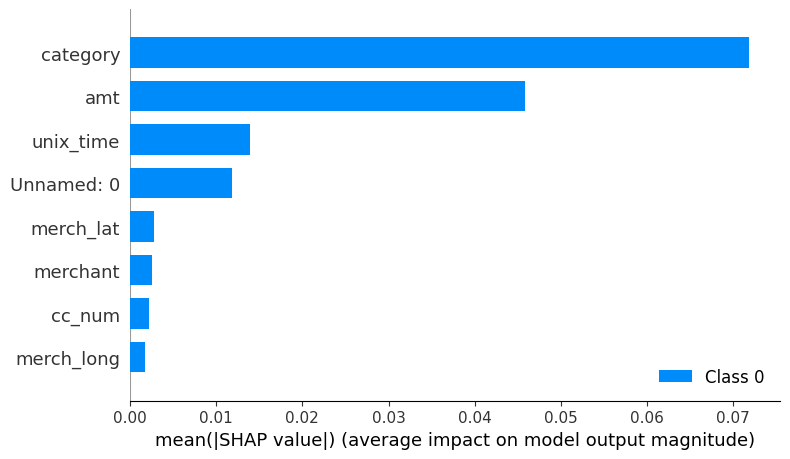

In [ ]:
# Visualización de la importancia de las características con SHAP
shap.summary_plot(shap_values, X_test[:10], feature_names=X.columns)


## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(min_samples_leaf=5, class_weight='balanced', random_state=42)

start = time.time()
rf_classifier.fit(X_train, y_train)
training_time = time.time() - start


In [ ]:
y_pred = rf_classifier.predict(X_valid)
y_pred_prob = rf_classifier.predict_proba(X_valid)[:, 1]

print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208517
           1       0.67      0.77      0.71      1198

    accuracy                           1.00    209715
   macro avg       0.83      0.88      0.86    209715
weighted avg       1.00      1.00      1.00    209715



F1-score: 0.7128712871287128
Matriz de Confusión:
[[208090    444]
 [   281    900]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208534
           1       0.67      0.76      0.71      1181

    accuracy                           1.00    209715
   macro avg       0.83      0.88      0.86    209715
weighted avg       1.00      1.00      1.00    209715



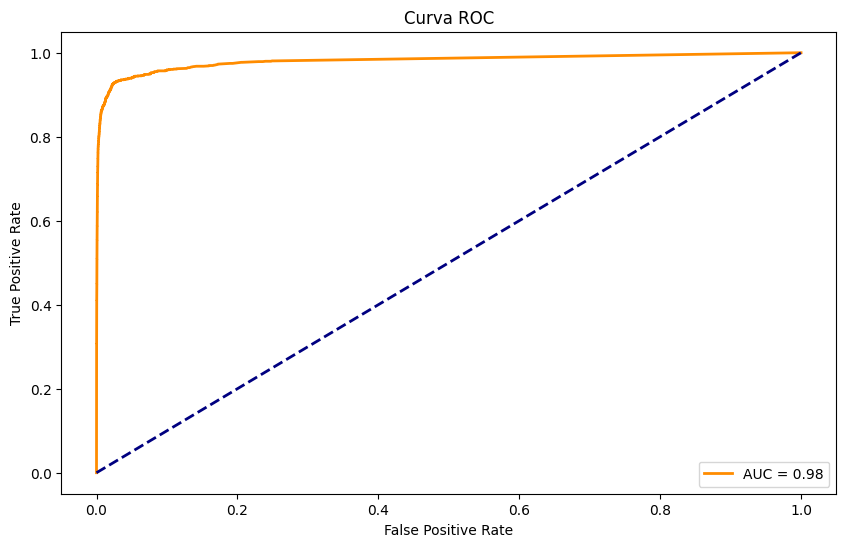

In [ ]:
start = time.time()
y_pred = rf_classifier.predict(X_test)
inference_time = time.time() - start
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1}")

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Mostrar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Generar nombres de columnas genéricos si los nombres originales no están disponibles
feature_names_random_forest = [f'feature_{i}' for i in range(X_train.shape[1])]

# Usar estos nombres genéricos para el explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=feature_names_random_forest,
    class_names=['Not Fraud', 'Fraud'],
    mode='classification'
)

# Elegir una instancia para explicar
i = 10  # Por ejemplo, explicar la predicción para la décima instancia del conjunto de test
instance = X_test[i].reshape(1, -1)  # Usar indexación estándar de NumPy

# Generar explicación para la instancia seleccionada
exp = explainer.explain_instance(instance[0], rf_classifier.predict_proba, num_features=10)

# Mostrar la explicación
exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
!pip show shap  # Verificar la versión instalada
!pip install --upgrade shap  # Actualizar SHAP

Name: shap
Version: 0.44.1
Summary: A unified approach to explain the output of any machine learning model.
Home-page: 
Author: 
Author-email: Scott Lundberg <slund1@cs.washington.edu>
License: MIT License
Location: /usr/local/lib/python3.10/dist-packages
Requires: cloudpickle, numba, numpy, packaging, pandas, scikit-learn, scipy, slicer, tqdm
Required-by: 


In [ ]:
# Visualizar los valores SHAP para la primera predicción del subconjunto
shap.initjs()

# Para modelo de clasificación binaria y shap_values es una lista:
if isinstance(shap_values, list):
    # Para clasificación binaria, shap_values[1] corresponde a la clase positiva en muchos casos.
    # Asegúrate de que esto se alinea con tu modelo específico.
    shap_values_instance = shap_values[1][0]  # Valores SHAP para la primera instancia y la clase positiva
    base_value = explainer.expected_value[1]  # Valor base para la clase positiva
else:
    # Para modelos de regresión o si solo hay un conjunto de valores SHAP
    shap_values_instance = shap_values[0]  # Valores SHAP para la primera instancia
    base_value = explainer.expected_value  # Valor base para el modelo

# Llamar a force_plot con los argumentos ajustados
shap.force_plot(base_value, shap_values_instance, X_test[:10][0])


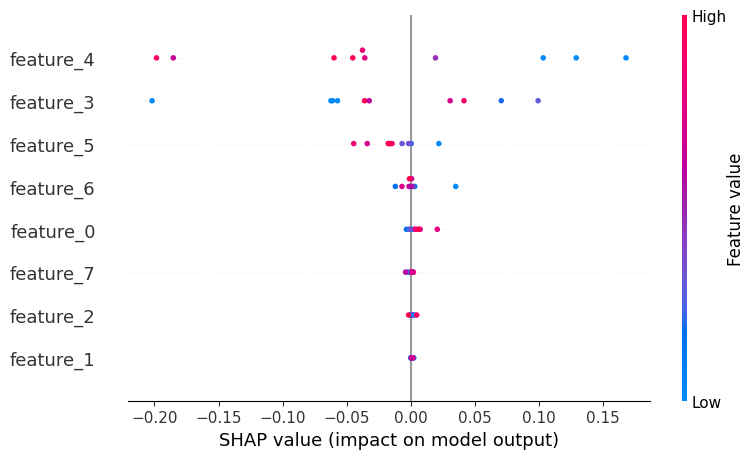

In [ ]:
# Visualización de la importancia de las características con SHAP
shap.summary_plot(shap_values, X_test[:10], feature_names=feature_names_random_forest)

In [ ]:
df_metrics.loc['Random forest'] = {'Precision': precision,
                                    'Recall': recall,
                                    'F1-score': f1,
                                    'ROC_AUC': roc_auc,
                                    'Training time': training_time,
                                    'Inference time': inference_time}
df_metrics

Precision    Recall  F1-score   ROC_AUC Training time  \
Neural net        0.195513  0.856054  0.318325  0.974986    218.766044   
Random forest     0.669643  0.762066  0.712871  0.980675    195.176393   
SVM                    NaN       NaN       NaN       NaN           NaN   
Naive Bayes            NaN       NaN       NaN       NaN           NaN   
Isolation forest       NaN       NaN       NaN       NaN           NaN   
KNN                    NaN       NaN       NaN       NaN           NaN   

                 Inference time  
Neural net            12.266394  
Random forest          3.119101  
SVM                         NaN  
Naive Bayes                 NaN  
Isolation forest            NaN  
KNN                         NaN

## Support vector machine (SVM)

In [ ]:
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

n_components = min(X.shape[0], X.shape[1]) - 1  # Elegir el número de componentes como el mínimo entre el número de muestras y el número de características
pca = PCA(n_components=n_components)
X = pca.fit_transform(X)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler ()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Aplicar oversampling para tratar el desequilibrio de clases (opcional)
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Crear y entrenar un clasificador SVM con ajuste de hiperparámetros
svm_classifier = SVC(kernel='rbf', C=1.0, class_weight='balanced', random_state=42)
start = time.time()
svm_classifier.fit(X_train_resampled, y_train_resampled)
training_time = time.time() - start

In [ ]:
# Realizar predicciones en el conjunto de prueba
start = time.time()
y_pred = svm_classifier.predict(X_test)
inference_time = time.time() - start

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Evaluar el modelo utilizando F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1}")

# Mostrar la matriz de confusión y el informe de clasificación
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Mostrar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
df_metrics.loc['SVM'] = {'Precision': precision,
                         'Recall': recall,
                         'F1-score': f1,
                         'ROC_AUC': roc_auc,
                         'Training time': training_time,
                         'Inference time': inference_time}
df_metrics

Precision    Recall  F1-score   ROC_AUC Training time  \
Neural net        0.224385   0.84928  0.354981  0.972267     176.61509   
Random forest     0.669643  0.762066  0.712871  0.980675     138.82161   
SVM                0.11552  0.668078  0.196979  0.819555    1283.04322   
Naive Bayes       0.140167  0.611346  0.228048  0.842057      0.297759   
Isolation forest  0.078207   0.15072  0.102979  0.825655     38.334477   
KNN                0.14281  0.736664  0.239241  0.872858      5.768543   

                 Inference time  
Neural net            10.332481  
Random forest           2.09489  
SVM                  529.597192  
Naive Bayes            0.015366  
Isolation forest      11.215755  
KNN                     67.9938

In [ ]:
# Generar nombres de características genéricos para los componentes de PCA
feature_names_pca = [f'PCA_{i+1}' for i in range(n_components)]

# Inicializar el explainer de LIME para datos tabulares
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=feature_names_pca,
    class_names=['Not Fraud', 'Fraud'],
    mode='classification'
)

# Elegir una instancia para explicar
i = 10  # Por ejemplo, explicar la predicción para la décima instancia del conjunto de test
instance = X_test[i].reshape(1, -1)

# Generar explicación para la instancia seleccionada
exp = explainer.explain_instance(instance[0], svm_classifier.predict_proba, num_features=10)

# Mostrar la explicación
exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
# Inicializar el explainer de SHAP
explainer = shap.KernelExplainer(svm_classifier.predict_proba, shap.sample(X_train, 100))

# Calcular los valores SHAP para un subconjunto de los datos de prueba
shap_values = explainer.shap_values(shap.sample(X_test, 10))

# Visualizar los valores SHAP para la primera predicción del subconjunto
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], feature_names=feature_names_pca)

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, f1_score

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

nb_classifier = GaussianNB()
start = time.time()
nb_classifier.fit(X_train_resampled, y_train_resampled)
training_time = time.time() - start

F1-score: 0.228048010107391
Matriz de Confusión:
[[204105   4429]
 [   459    722]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    208534
           1       0.14      0.61      0.23      1181

    accuracy                           0.98    209715
   macro avg       0.57      0.80      0.61    209715
weighted avg       0.99      0.98      0.98    209715



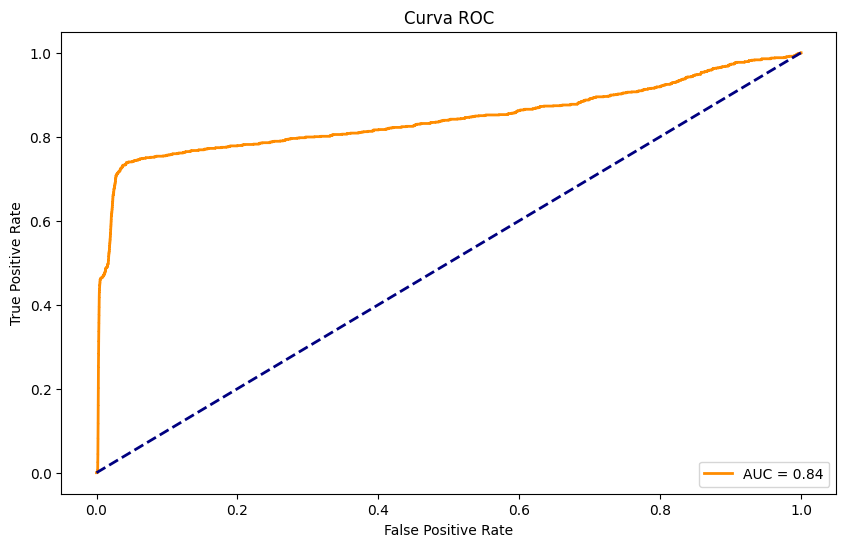

In [ ]:
# Realizar predicciones en el conjunto de prueba
start = time.time()
y_pred = nb_classifier.predict(X_test)
inference_time = time.time() - start
y_pred_prob = nb_classifier.predict_proba(X_test)[:, 1]

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Evaluar el modelo utilizando F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1}")

# Mostrar la matriz de confusión y el informe de clasificación
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Mostrar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
df_metrics.loc['Naive Bayes'] = {'Precision': precision,
                                 'Recall': recall,
                                 'F1-score': f1,
                                 'ROC_AUC': roc_auc,
                                 'Training time': training_time,
                                 'Inference time': inference_time}
df_metrics

Precision    Recall  F1-score   ROC_AUC Training time  \
Neural net        0.154402  0.868755  0.262203  0.977599    173.990917   
Random forest     0.866577  0.544454  0.668747  0.970336    187.879872   
SVM                    NaN       NaN       NaN       NaN           NaN   
Naive Bayes       0.140167  0.611346  0.228048  0.842057      0.297759   
Isolation forest       NaN       NaN       NaN       NaN           NaN   

                 Inference time  
Neural net            10.320024  
Random forest          1.998015  
SVM                         NaN  
Naive Bayes            0.015366  
Isolation forest            NaN

## Isolation forest

In [ ]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=200, max_samples=1000, contamination=0.01, random_state=42)  # Contamination le indica al modelo la proporción de outliers

# Entrenar el modelo solo con la clase "no fraude" (etiqueta 0)
start = time.time()
isolation_forest.fit(X_train[y_train == 0])
training_time = time.time() - start

F1-score: 0.10297946196123807
Matriz de Confusión:
[[206436   2098]
 [  1003    178]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    208534
           1       0.08      0.15      0.10      1181

    accuracy                           0.99    209715
   macro avg       0.54      0.57      0.55    209715
weighted avg       0.99      0.99      0.99    209715



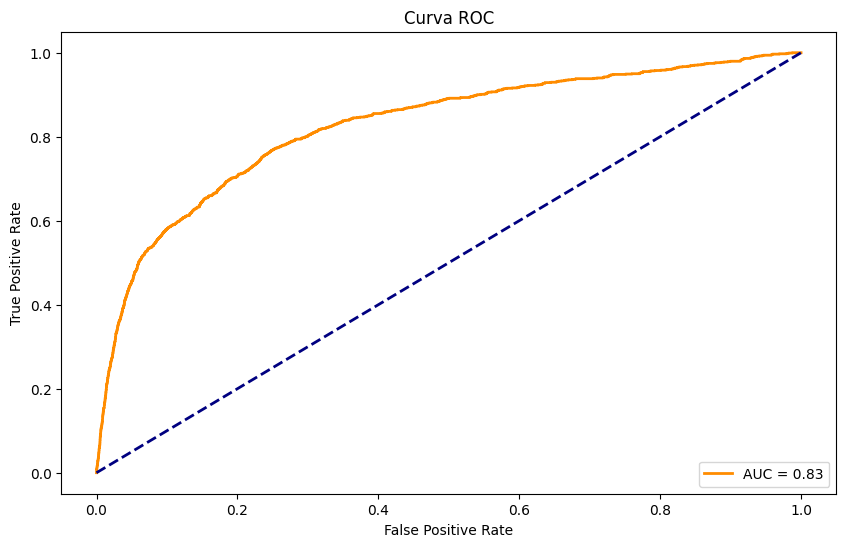

In [ ]:
# Evaluar el modelo en todo el conjunto de prueba
start = time.time()
y_pred = isolation_forest.predict(X_test)
inference_time = time.time() - start

# Convertir las predicciones (-1 para anomalía, 1 para normal) a etiquetas binarias (0 para normal, 1 para anomalía)
y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]

# Calcular la puntuación para poder variar el threshold y dibujar la curva ROC. Se multiplica por -1 para que las
# anomalías estén representadas por un 1
y_pred_score = -1 * isolation_forest.score_samples(X_test)

precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)

# Evaluar el modelo utilizando F1-score
f1 = f1_score(y_test, y_pred_binary)
print(f"F1-score: {f1}")

# Mostrar la matriz de confusión y el informe de clasificación
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_binary))

print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_binary))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
roc_auc = auc(fpr, tpr)

# Mostrar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
df_metrics.loc['Isolation forest'] = {'Precision': precision,
                                      'Recall': recall,
                                      'F1-score': f1,
                                      'ROC_AUC': roc_auc,
                                      'Training time': training_time,
                                      'Inference time': inference_time}
df_metrics

Precision    Recall  F1-score   ROC_AUC Training time  \
Neural net        0.224385   0.84928  0.354981  0.972267     176.61509   
Random forest     0.669643  0.762066  0.712871  0.980675     138.82161   
SVM                    NaN       NaN       NaN       NaN           NaN   
Naive Bayes       0.140167  0.611346  0.228048  0.842057      0.297759   
Isolation forest  0.078207   0.15072  0.102979  0.825655     38.334477   

                 Inference time  
Neural net            10.332481  
Random forest           2.09489  
SVM                         NaN  
Naive Bayes            0.015366  
Isolation forest      11.215755

## Random Forest con selección de características (usando Random Forest)

In [ ]:
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Crear un clasificador Random Forest para evaluar la importancia de las características
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Seleccionar características importantes utilizando la importancia de las características
feature_selector = SelectFromModel(rf_classifier, threshold='median')
feature_selector.fit(X_train_resampled, y_train_resampled)

# Aplicar la selección de características a los conjuntos de entrenamiento y prueba
X_train_selected = feature_selector.transform(X_train_resampled)
X_test_selected = feature_selector.transform(X_test)

# Crear y entrenar un clasificador Random Forest con características seleccionadas
rf_classifier_selected = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_classifier_selected.fit(X_train_selected, y_train_resampled)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-e71c7664bbc6>", line 8, in <cell line: 8>
    X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
NameError: name 'X_train' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr

TypeError: object of type 'NoneType' has no len()

In [ ]:
# Realizar predicciones en el conjunto de prueba con características seleccionadas
y_pred_selected = rf_classifier_selected.predict(X_test_selected)

# Evaluar el modelo utilizando F1-score
f1_selected = f1_score(y_test, y_pred_selected)
print(f"F1-score con características seleccionadas: {f1_selected}")

# Mostrar la matriz de confusión y el informe de clasificación
print("Matriz de Confusión con características seleccionadas:")
print(confusion_matrix(y_test, y_pred_selected))

print("\nInforme de Clasificación con características seleccionadas:")
print(classification_report(y_test, y_pred_selected))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Mostrar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import classification_report, confusion_matrix, f1_score

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

knn_classifier = KNeighborsClassifier(n_neighbors=7)
start = time.time()
knn_classifier.fit(X_train_resampled, y_train_resampled)
training_time = time.time() - start

F1-score: 0.2392410284614327
Matriz de Confusión:
[[203312   5222]
 [   311    870]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    208534
           1       0.14      0.74      0.24      1181

    accuracy                           0.97    209715
   macro avg       0.57      0.86      0.61    209715
weighted avg       0.99      0.97      0.98    209715



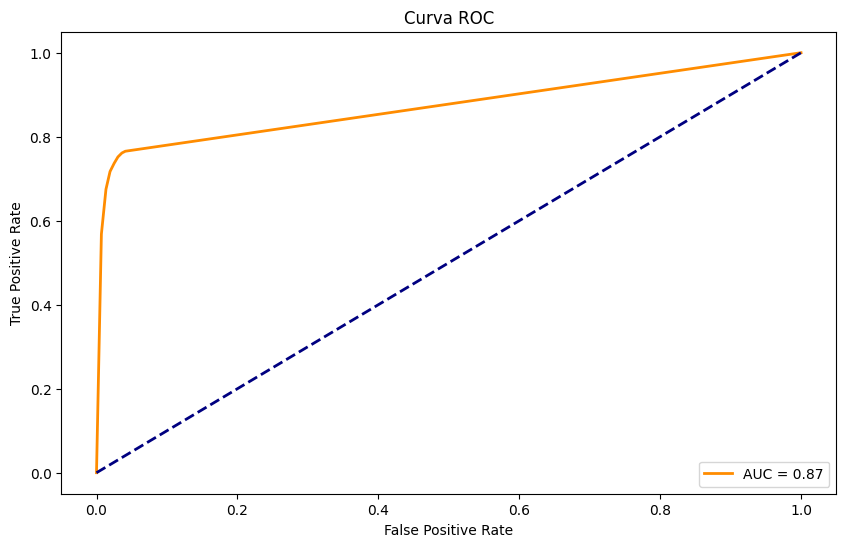

In [ ]:
# Realizar predicciones en el conjunto de prueba
start = time.time()
y_pred = knn_classifier.predict(X_test)
inference_time = time.time() - start

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Evaluar el modelo utilizando F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1}")

# Mostrar la matriz de confusión y el informe de clasificación
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))

# Calcular la probabilidad de predicciones para la curva ROC (en KNN se utiliza decision_function en lugar de predict_proba)
y_scores = knn_classifier.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Mostrar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
df_metrics.loc['KNN'] = {'Precision': precision,
                         'Recall': recall,
                         'F1-score': f1,
                         'ROC_AUC': roc_auc,
                         'Training time': training_time,
                         'Inference time': inference_time}
df_metrics

Precision    Recall  F1-score   ROC_AUC Training time  \
Neural net        0.224385   0.84928  0.354981  0.972267     176.61509   
Random forest     0.669643  0.762066  0.712871  0.980675     138.82161   
SVM                    NaN       NaN       NaN       NaN           NaN   
Naive Bayes       0.140167  0.611346  0.228048  0.842057      0.297759   
Isolation forest  0.078207   0.15072  0.102979  0.825655     38.334477   
KNN                0.14281  0.736664  0.239241  0.872858      5.768543   

                 Inference time  
Neural net            10.332481  
Random forest           2.09489  
SVM                         NaN  
Naive Bayes            0.015366  
Isolation forest      11.215755  
KNN                     67.9938

## LSTM

1. Preparar los Datos para LSTM


LSTM requiere que los datos estén en un formato de secuencia. En este caso, parece que no tienes datos secuenciales explícitos, así que usaremos los datos disponibles como si cada fila fuera una secuencia independiente. Esto es una simplificación y puede no ser lo ideal, pero sin una estructura de tiempo o secuencia explícita, es una aproximación razonable.

In [ ]:
# Cambiar la forma de los datos para LSTM: [muestras, pasos de tiempo, características]
# En este caso, se utilizará 1 paso de tiempo y todas las características
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_valid = X_valid.reshape((X_valid.shape[0], 1, X_valid.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

2. Construir y Entrenar el Modelo LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Construir el modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/20
19661/19661 [==============================] - 168s 8ms/step - loss: 0.0235 - accuracy: 0.9942 - val_loss: 0.0174 - val_accuracy: 0.9953
Epoch 2/20
19661/19661 [==============================] - 143s 7ms/step - loss: 0.0173 - accuracy: 0.9952 - val_loss: 0.0166 - val_accuracy: 0.9954
Epoch 3/20
19661/19661 [==============================] - 149s 8ms/step - loss: 0.0166 - accuracy: 0.9954 - val_loss: 0.0155 - val_accuracy: 0.9957
Epoch 4/20
19661/19661 [==============================] - 151s 8ms/step - loss: 0.0158 - accuracy: 0.9955 - val_loss: 0.0150 - val_accuracy: 0.9957
Epoch 5/20
19661/19661 [==============================] - 153s 8ms/step - loss: 0.0151 - accuracy: 0.9957 - val_loss: 0.0140 - val_accuracy: 0.9957
Epoch 6/20
19661/19661 [==============================] - 143s 7ms/step - loss: 0.0143 - accuracy: 0.9957 - val_loss: 0.0135 - val_accuracy: 0.9957
Epoch 7/20
19661/19661 [==============================] - 144s 7ms/step - loss: 0.0137 - accuracy: 0.9958 - val_

3. Se evalua el Modelo

6554/6554 [==============================] - 19s 3ms/step
F1-score: 0.6890676762896356
Matriz de Confusión:
[[208330    204]
 [   453    728]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208534
           1       0.78      0.62      0.69      1181

    accuracy                           1.00    209715
   macro avg       0.89      0.81      0.84    209715
weighted avg       1.00      1.00      1.00    209715



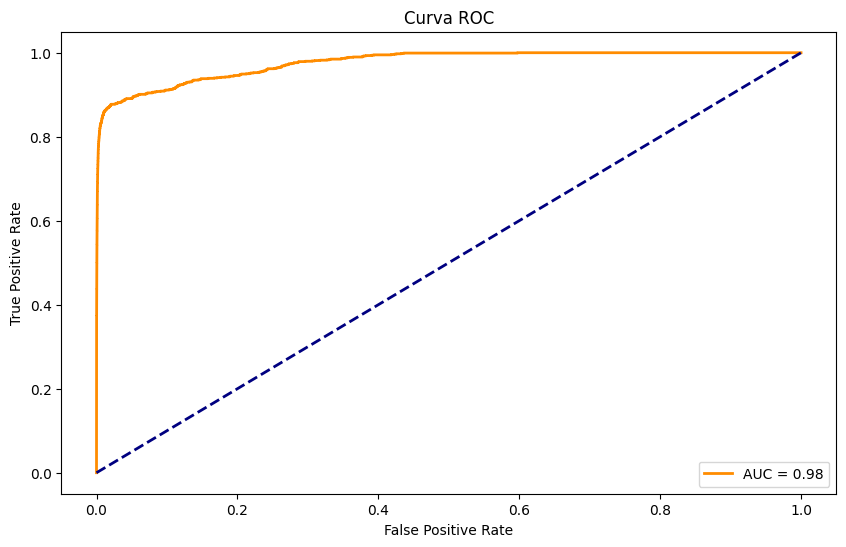

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Realizar predicciones y calcular métricas
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Métricas de evaluación
print(f"F1-score: {f1_score(y_test, y_pred)}")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))

# Calcular la curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Reutilización de modelos y métricas

In [ ]:
ruta_objetos = '/content/drive/My Drive/Colab Notebooks/objects/TFM/'

### Guardado

In [ ]:
# Métricas
pickle.dump(df_metrics, open(ruta_objetos + 'df_metrics.pickle', 'wb'))

In [ ]:
# Red neuronal
pickle.dump(neural_net, open(ruta_objetos + 'neural_net.pickle', 'wb'))

In [ ]:
# Random forest
pickle.dump(rf_classifier, open(ruta_objetos + 'rf_classifier.pickle', 'wb'))

In [ ]:
# SVM
pickle.dump(svm_classifier, open(ruta_objetos + 'svm_classifier.pickle', 'wb'))

In [ ]:
# Naive Bayes
pickle.dump(nb_classifier, open(ruta_objetos + 'nb_classifier.pickle', 'wb'))

In [ ]:
# Isolation forest
pickle.dump(isolation_forest, open(ruta_objetos + 'isolation_forest.pickle', 'wb'))

In [ ]:
# KNN
pickle.dump(knn_classifier, open(ruta_objetos + 'knn_classifier.pickle', 'wb'))

### Carga

In [ ]:
# Métricas
df_metrics = pickle.load(open(ruta_objetos + 'df_metrics.pickle', 'rb'))

In [ ]:
# Red neuronal
neural_net = pickle.load(open(ruta_objetos + 'neural_net.pickle', 'rb'))

In [ ]:
# Random forest
rf_classifier = pickle.load(open(ruta_objetos + 'rf_classifier.pickle', 'rb'))

In [ ]:
# SVM
svm_classifier = pickle.load(open(ruta_objetos + 'svm_classifier.pickle', 'rb'))

In [ ]:
# Naive Bayes
nb_classifier = pickle.load(open(ruta_objetos + 'nb_classifier.pickle', 'rb'))

In [ ]:
# Isolation forest
isolation_forest = pickle.load(open(ruta_objetos + 'isolation_forest.pickle', 'rb'))

In [ ]:
# KNN
knn_classifier = pickle.load(open(ruta_objetos + 'knn_classifier.pickle', 'rb'))

## Para visualización

In [ ]:
df_metrics

Precision    Recall  F1-score   ROC_AUC Training time  \
Neural net        0.224385   0.84928  0.354981  0.972267     176.61509   
Random forest     0.669643  0.762066  0.712871  0.980675     138.82161   
SVM               0.107722  0.747671  0.188313  0.856299  87728.572011   
Naive Bayes       0.140167  0.611346  0.228048  0.842057      0.297759   
Isolation forest  0.078207   0.15072  0.102979  0.825655     38.334477   
KNN                0.14281  0.736664  0.239241  0.872858      5.768543   

                 Inference time  
Neural net            10.332481  
Random forest           2.09489  
SVM                 9329.166794  
Naive Bayes            0.015366  
Isolation forest      11.215755  
KNN                     67.9938

In [ ]:
# Se incorporan los resultados de la ejecución en otro notebook
df_metrics.loc['LSTM'] = {'Precision': 0.78,
                         'Recall': 0.62,
                         'F1-score': 0.689,
                         'ROC_AUC': 0.98,
                         'Training time': 2741,
                         'Inference time': 19}
df_metrics

Precision    Recall  F1-score   ROC_AUC Training time  \
Neural net        0.224385   0.84928  0.354981  0.972267     176.61509   
Random forest     0.669643  0.762066  0.712871  0.980675     138.82161   
SVM               0.107722  0.747671  0.188313  0.856299  87728.572011   
Naive Bayes       0.140167  0.611346  0.228048  0.842057      0.297759   
Isolation forest  0.078207   0.15072  0.102979  0.825655     38.334477   
KNN                0.14281  0.736664  0.239241  0.872858      5.768543   
LSTM                  0.78      0.62     0.689      0.98          2741   

                 Inference time  
Neural net            10.332481  
Random forest           2.09489  
SVM                 9329.166794  
Naive Bayes            0.015366  
Isolation forest      11.215755  
KNN                     67.9938  
LSTM                         19

In [ ]:
df_metrics['Inference time'] = df_metrics['Inference time'] / len(X_test)

In [ ]:
df_metrics['Inference time (ms)'] = df_metrics['Inference time'] * 1000

In [ ]:
df_metrics

Precision    Recall  F1-score   ROC_AUC Training time  \
Neural net        0.224385   0.84928  0.354981  0.972267     176.61509   
Random forest     0.669643  0.762066  0.712871  0.980675     138.82161   
SVM               0.107722  0.747671  0.188313  0.856299  87728.572011   
Naive Bayes       0.140167  0.611346  0.228048  0.842057      0.297759   
Isolation forest  0.078207   0.15072  0.102979  0.825655     38.334477   
KNN                0.14281  0.736664  0.239241  0.872858      5.768543   
LSTM                  0.78      0.62     0.689      0.98          2741   

                 Inference time Inference time (ms)  
Neural net             0.000049            0.049269  
Random forest           0.00001            0.009989  
SVM                    0.044485           44.484976  
Naive Bayes                 0.0            0.000073  
Isolation forest       0.000053            0.053481  
KNN                    0.000324             0.32422  
LSTM                   0.000091            0.090599

### Precisión y recall

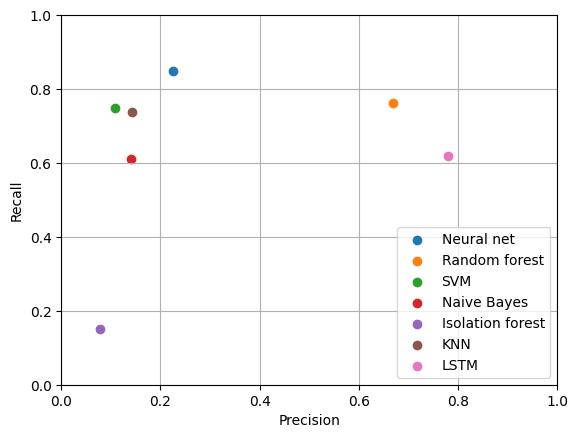

In [ ]:
scatter_x = df_metrics['Precision']
scatter_y = df_metrics['Recall']

fig, ax = plt.subplots()
for i in range(len(df_metrics.index)):
    ax.scatter(scatter_x[i], scatter_y[i], label=df_metrics.index[i])

ax.legend()
ax.grid()

ax.set_xlabel('Precision')
ax.set_ylabel('Recall')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.show()

### Tiempo de entrenamiento

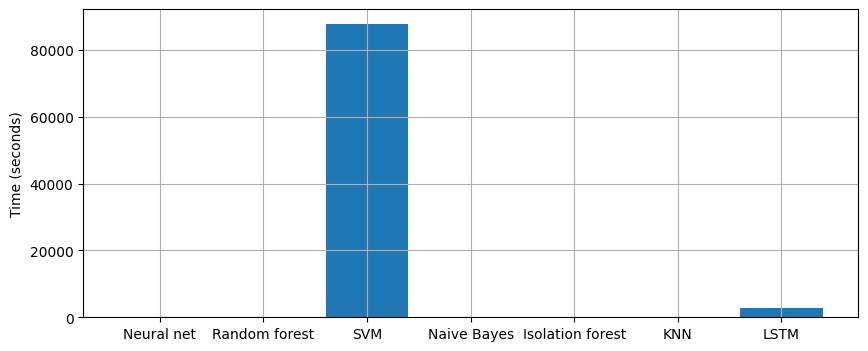

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(df_metrics.index, df_metrics['Training time'])
ax.set_ylabel('Time (seconds)')
ax.grid()

plt.show()

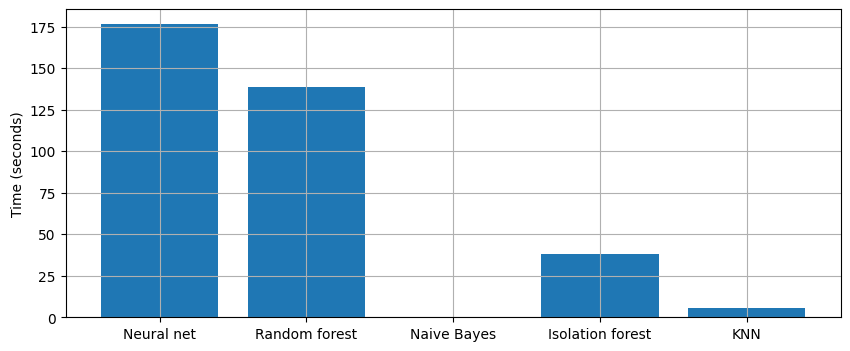

In [ ]:
df_metrics2 = df_metrics.drop(['SVM', 'LSTM'])
fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(df_metrics2.index, df_metrics2['Training time'])
ax.set_ylabel('Time (seconds)')
ax.grid()

plt.show()

### Tiempo de inferencia

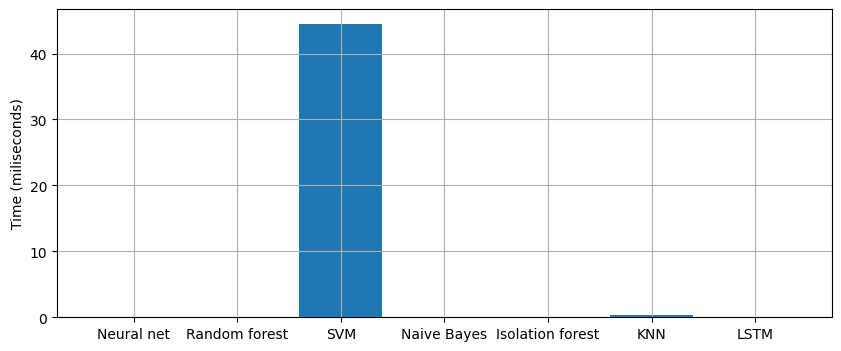

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(df_metrics.index, df_metrics['Inference time (ms)'])
ax.set_ylabel('Time (miliseconds)')
ax.grid()

plt.show()

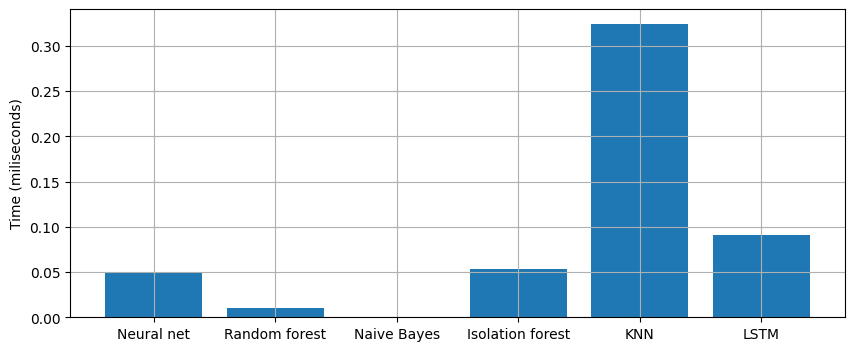

In [ ]:
df_metrics2 = df_metrics.drop(['SVM'])
fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(df_metrics2.index, df_metrics2['Inference time (ms)'])
ax.set_ylabel('Time (miliseconds)')
ax.grid()

plt.show()